# Solution Simulation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import math

- solution analytique:

In [2]:
# constante du système
tau = 20

# paramètres de simulation
h = 0.01
start = 0
end = 100

n = int((end - start) / h) + 1

# vecteurs de données
t = [i * h for i in range(n)]
u = [1 for _ in t]

In [3]:
# solution analytique
y_ana = [u_i - math.exp(-t_i/tau) for u_i, t_i in zip(u, t)]

In [4]:
def my_plot(t, u, y, title):
    # affichage de la courbe
    fig, ax = plt.subplots()
    ax.plot(t, u, t, y)
    ax.grid(True, which='both')
    ax.set_title(title)
    ax.set_xlabel('temps [s]')
    ax.set_ylabel('$\mathrm{U_c}\; \mathrm{[V]}$')

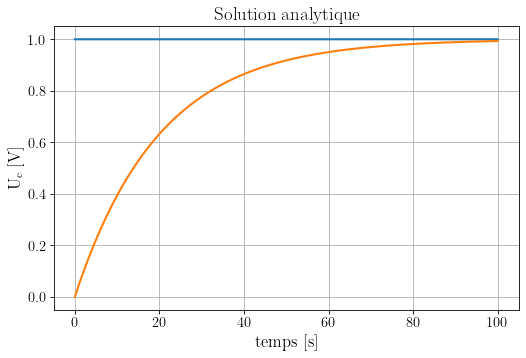

In [5]:
my_plot(t, u, y_ana, 'Solution analytique')

- méthode d'Euler:

In [6]:
class RC:
    def __init__(self, tau):
        self.tau = tau

    def x_prime(self, t, x, u):
        dx_dt = (u - x[0]) / self.tau

        return [dx_dt]

In [7]:
def solve_euler(system, t, x, u, h):
    dx_dt = system.x_prime(t, x, u)

    new_state = [state + h * dstate for state, dstate in zip(x, dx_dt)]

    return new_state

In [8]:
def run(system, t, x, u, h, solver):
    for i in range(len(t) - 1):
        x0 = [state[-1] for state in x]

        new_state = solver(system, t[i], x0, u[i], h)
        
        for i, state in enumerate(new_state):
            x[i].append(state)

In [9]:
system = RC(tau)

In [10]:
# initialisation de l'état
y_eul = [[0]]

run(system, t, y_eul, u, h, solve_euler)

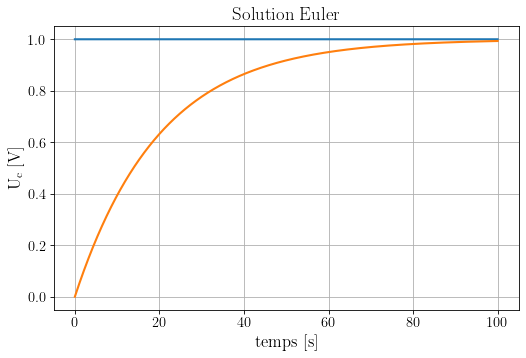

In [11]:
my_plot(t, u, y_eul[0], 'Solution Euler')

In [12]:
print('La somme des erreurs cumulées vaut: {}'.format(sum(y_ana) - sum(y_eul[0])))

La somme des erreurs cumulées vaut: -0.47984087851091317


- méthode de Runge Kutta 4:

In [13]:
def solve_rk4(system, t, x, u, h):
    c1 = [h * dstate for dstate in system.x_prime(t, x, u)]
    
    x2 = [x_i + 0.5 * c_i for x_i, c_i in zip(x, c1)]
    c2 = [h * dstate for dstate in system.x_prime(t, x2, u)]
    
    x3 = [x_i + 0.5 * c_i for x_i, c_i in zip(x, c2)]
    c3 = [h * dstate for dstate in system.x_prime(t, x3, u)]
    
    x4 = [x_i + c_i for x_i, c_i in zip(x, c3)]
    c4 = [h * dstate for dstate in system.x_prime(t, x4, u)]

    new_state = [state + (c_1i + 2 * c_2i + 2 * c_3i + c_4i) / 6 
                 for state, c_1i, c_2i, c_3i, c_4i in zip(x, c1, c2, c3, c4)]

    return new_state

In [14]:
# initialisation de l'état
y_rk4 = [[0]]

run(system, t, y_rk4, u, h, solve_rk4)

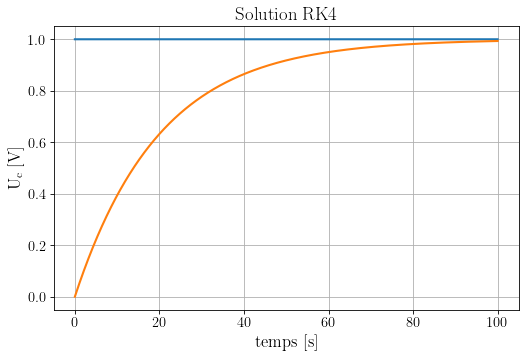

In [15]:
my_plot(t, u, y_rk4[0], 'Solution RK4')

In [16]:
print('La somme des erreurs cumulées vaut: {}'.format(sum(y_ana) - sum(y_rk4[0])))

La somme des erreurs cumulées vaut: -7.275957614183426e-12
